In [1]:
# 케라스는 텐서플로우의 하이레벨 API, 공식 텐서플로우 API로 채택

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 세가지
# 케라스는 텐서객체를 반드시 줄 필요 없음. 시리즈 등등 가능
# 내부적으로 tensor로 바꾸는 기능이 있음

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam 

In [4]:
df = pd.read_csv('data/cars.csv')
df.columns = ['speed', 'dist']
df

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16
5,9,10
6,10,18
7,10,26
8,10,34
9,11,17


In [6]:
# Dense 개체 생성
# units 는 출력 개수, 혹은 라벨의 개수(여기서는 제동거리이므로 1개)
# input_dim은 feature의 개수(여기서는 자동차 속도)
# ex. 광고비 매출(feature)과 직원 근무 시간(feature)에 따른 수익

IO = Dense(units=1, input_dim=1)


# 리스트로 주어야 함
# sequential 순차적 구조로 Dense를 쌓아 올림 => 여러개 쌓아올릴 경우 딥러닝
model = Sequential( [IO] )


# loss는 cost랑 동일
# Adam의 러닝메이트 = 0.1 -> 러닝메이트 스스로 조절 가능
# optimizer의 종류는 매우 다양함
model.compile( loss = 'mean_squared_error', optimizer = Adam(0.1) )



#epochs = 학습 횟수
h = model.fit(df['speed'], df['dist'], epochs = 500)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 50 samples
Epoch 1/500
50/50 [==============================] - 1s 18ms/sample - loss: 1032.8612
Epoch 2/500
50/50 [==============================] - 0s 250us/sample - loss: 861.0318
Epoch 3/500
50/50 [==============================] - 0s 80us/sample - loss: 705.5468
Epoch 4/500
50/50 [==============================] - 0s 80us/sample - loss: 578.3250
Epoch 5/500
50/50 [==============================] - 0s 100us/sample - loss: 467.0392
Epoch 6/500
50/50 [==============================] - 0s 60us/sample - loss: 404.5990
Epoch 7/500
50/50 [==============================] - 0s 100us/sample - loss: 333.2783
Epoch 8/500
50/50 [==============================] - 0s 60us/sample - loss: 297.7619
Epoch 9/500
50/50 [==============================] - 0s 100us/sample - loss: 272.7434
Epoch 10/500
50/50 [==============================] - 0s 100us/sample - loss: 268.2430
Epoch 11/500
50/50 [======================

In [17]:
# numpy nd.array개체

wb = IO.get_weights()
wb

[array([[3.8424668]], dtype=float32), array([-15.849971], dtype=float32)]

In [16]:
# 최종 w값

float(wb[0])

3.8424668312072754

In [15]:
# 최종 b값

float(wb[1])

-15.849970817565918

In [8]:
# loss키를 줄 경우 cost값 확인 가능
h.history['loss']

[1032.86125,
 861.0318115234375,
 705.5468481445313,
 578.3250427246094,
 467.039208984375,
 404.59900848388673,
 333.2783056640625,
 297.7619311523438,
 272.74341796875,
 268.2429528808594,
 265.54991943359374,
 272.51131103515627,
 275.64448486328126,
 280.41743896484377,
 284.8058166503906,
 285.4602685546875,
 283.9780065917969,
 280.531669921875,
 276.3908312988281,
 273.1623834228516,
 269.37122314453126,
 264.78340087890626,
 264.00447814941407,
 263.78558837890625,
 264.2836279296875,
 264.0653552246094,
 265.0088427734375,
 264.6133764648437,
 264.24876220703123,
 263.9061596679687,
 263.56982666015625,
 262.9083349609375,
 262.34275634765623,
 261.79445556640627,
 261.8388555908203,
 261.61779052734374,
 261.88410095214846,
 261.5475244140625,
 261.84929931640625,
 261.7006201171875,
 261.0147009277344,
 261.0016845703125,
 260.53380126953124,
 260.3511804199219,
 260.0606799316406,
 259.9226770019531,
 259.8431427001953,
 259.4393798828125,
 259.3095166015625,
 259.196423339

<function matplotlib.pyplot.show(*args, **kw)>

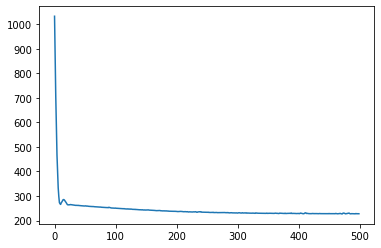

In [9]:
plt.plot(h.history['loss'])
plt.show

In [18]:
# 예측값 추정

model.predict( [20] )

array([[60.999363]], dtype=float32)

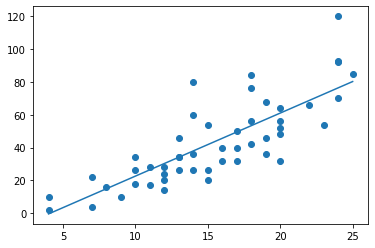

In [29]:
plt.scatter(df['speed'], df['dist'])

# 예측하는 방법 까먹지 않을 것
plt.plot(df['speed'], model.predict(df['speed']))
plt.show()